В этой программе я выясняю, какие существительные и прилагательные встречаются после *кто* у каждого из участников переписки, и строю облака слов по этим данным.

In [1]:
import sqlite3
from collections import Counter
import pymorphy2
morph = pymorphy2.MorphAnalyzer()

In [2]:
conn = sqlite3.connect('oleg.db')
cur = conn.cursor()

In [3]:
def nothing():
    return

## Для первого участника

In [4]:
cur.execute('''
select text
from texts
join meta on texts.id = meta.id
where instr(text, "ты") != 0 or instr(text, "Ты") != 0 and sender == "Val"''')

v_mess = cur.fetchall()

In [5]:
def is_right(s, j):
    s = s.lower().split()
    
    if 'ты' in s:
        i = s.index('ты')
    else:
        return
    
    try:
        pos = morph.parse(s[i+j])[0].tag.POS
        lemma = morph.parse(s[i+j])[0].normal_form
        if lemma == 'право':
            lemma = 'прав'
    except IndexError:
        pos = 0
    
    if pos == 'NOUN' or pos == 'ADJF':
        return lemma

In [6]:
def get_words(mess):
    words = []
    for el in mess:
        word = is_right(el[0], 1)
        if word:
            words.append(word)
        word = is_right(el[0], 2)
        if word:
            words.append(word)
    return words

In [7]:
def get_cnt(words):
    return Counter(words).most_common()

In [8]:
def m(mess):
    words = get_words(mess)
    cnt = get_cnt(words)
    return words, cnt

In [9]:
v_words = m(v_mess)[0]

## Для второго участника

In [10]:
cur.execute('''
select text
from texts
join meta on texts.id = meta.id
where instr(text, "ты") != 0 or instr(text, "Ты") != 0 and sender == "Oleg"''')

o_mess = cur.fetchall()

In [11]:
o_words = m(o_mess)[0]

## Облака слов

In [12]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
import random

In [13]:
def grey_color_func(word, font_size, position, orientation, random_state=None,
                    **kwargs):
    return "hsl(281, 48%%, %d%%)" % random.randint(30, 70)

In [14]:
def cloud(words):
    text = ' '.join(words)

    wordcloud = WordCloud(
        background_color ='white',
        width = 800,
        height = 800, 
        stopwords = ('сам','весь', 'такой')
    ).generate(text)

    plt.figure(figsize = (8, 8), facecolor = None) 
    plt.imshow(wordcloud.recolor(color_func=grey_color_func, random_state=3),
               interpolation="bilinear")
    plt.axis("off") 
    plt.show()

Как второй участник называл первого:

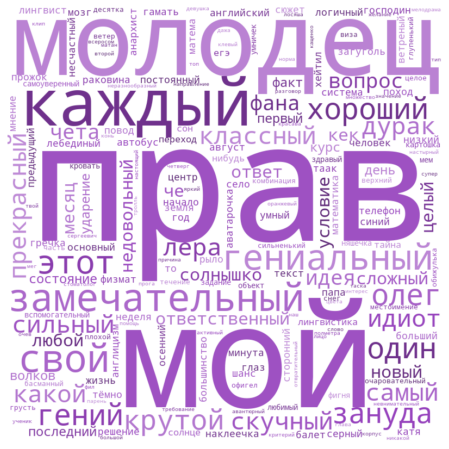

In [15]:
cloud(o_words)

Как первый участник называл второго:

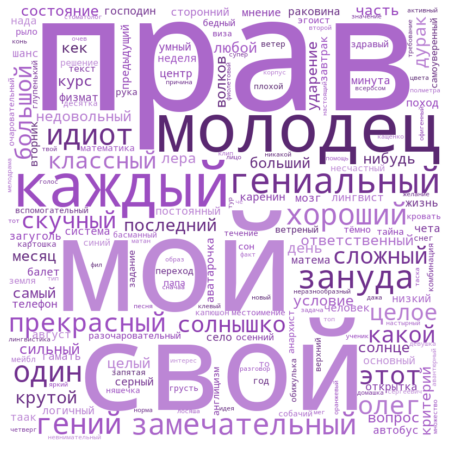

In [16]:
cloud(v_words)